In [1]:
from Methods import*
import pandas as pd

In [2]:
data = pd.read_excel('G:/ahmed/Final Project ds tools/Egyptian-Cars-Analysis/DataSetScraping3.xlsx')
df = data.copy()

In [3]:
df_1 = df.copy()
Modify = Modify(df_1)

In [4]:
df_int =Modify.Extract_int(['Price','Milage'])
df_int[(df_int['Transmission'] != 'أتوماتيك\u200e') & (df_int['Transmission'] != 'مانيوال') & (df_int['Transmission'] !='DSG')]

The Number of values that don't have a number is : 0

The Number of values that don't have a number is : 64



,Brand,Model,Options,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date


In [5]:
df_2 = Modify.fill_na_mileage(df_int,'Year','Milage')

In [6]:
df_2.loc[df_2['Milage'].isna()]

,Brand,Model,Options,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date


In [7]:
df_3 = Modify.fill_zero_mileage(df_2,'Year','Milage')

The Number of values that don't have a number is : 64



In [8]:
df_3.loc[df_3['Milage']==0]

,Brand,Model,Options,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date
13947,فولكس فاغن ...,بيتل ...,NaN,1971,0,مانيوال,التجمع - القاهرة الجديدة,أزرق,بنزين,95000,2025-02-10


In [9]:
df_3['Price'] = df_3['Price'].astype('int64')

In [10]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         22557 non-null  object
 1   Model         22557 non-null  object
 2   Options       6860 non-null   object
 3   Year          22557 non-null  int64 
 4   Milage        22557 non-null  int64 
 5   Transmission  22557 non-null  object
 6   Location      22557 non-null  object
 7   Color         22557 non-null  object
 8   Fuel          22557 non-null  object
 9   Price         22557 non-null  int64 
 10  Post Date     22557 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [11]:
df_3[(df_3['Transmission'] != 'أتوماتيك\u200e') & (df_3['Transmission'] != 'مانيوال') & (df_3['Transmission'] !='DSG')]

,Brand,Model,Options,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date


In [12]:
df_3 = df_3.drop(df_3[df_3['Milage']==0].index)

In [13]:
df_3.shape

(22556, 11)

In [14]:
print(df_3[(df_3['Milage']<10000)&(df_3['Year']<2024)].shape)
Mileage_less_10000 = df_3[(df_3['Milage']<10000)&(df_3['Year']<2024)].index

(277, 11)


In [15]:
df_3[(df_3['Milage']<10000)&(df_3['Year']<2024)]

,Brand,Model,Options,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date
4,بي ام دبليو ...,X3,اتوماتيك / Comfort,2018,168,أتوماتيك‎,6 أكتوبر,فضي,بنزين,1800000,2025-04-18
17,هيونداي ...,فيرنا ...,NaN,2015,350,أتوماتيك‎,6 أكتوبر,رمادي,بنزين,410000,2025-04-18
18,هيونداي ...,إلنترا اتش دى ...,NaN,2015,350,أتوماتيك‎,6 أكتوبر,رمادي,بنزين,630000,2025-04-18
20,فيات ...,128,NaN,1977,1,مانيوال,المعادى,احمر,بنزين,45000,2025-04-18
24,سكودا ...,فيليشيا ...,NaN,1995,200,أتوماتيك‎,سفاجا,أزرق,بنزين,140,2025-04-18
...,...,...,...,...,...,...,...,...,...,...,...
22309,مرسيدس ...,GLC 200,NaN,2023,5000,أتوماتيك‎,المنصورة,أسود,بنزين,5500000,2025-01-24
22370,مرسيدس ...,C 180,NaN,2023,2850,أتوماتيك‎,دمياط,فضي,بنزين,3195000,2025-01-23
22371,بيجو ...,3008,NaN,2023,2850,أتوماتيك‎,دمياط,فضي,بنزين,1650000,2025-01-23
22496,دونج فنج ...,فينوتشيا ستار ...,اتوماتيك,2023,7000,أتوماتيك‎,الهرم,أبيض,بنزين,1250000,2025-01-21


In [16]:
df_4 = df_3.copy()

In [17]:
Group_By_brand_Mileage = df_3.groupby(['Brand','Year'])['Milage'].mean().round().reset_index()
Group_By_brand_Mileage

,Brand,Year,Milage
0,اسبيرانزا ...,1990,105121.0
1,اسبيرانزا ...,2004,165000.0
2,اسبيرانزا ...,2005,177444.0
3,اسبيرانزا ...,2006,182500.0
4,اسبيرانزا ...,2007,198459.0
...,...,...,...
1496,هيونداي ...,2022,65544.0
1497,هيونداي ...,2023,31335.0
1498,هيونداي ...,2024,13220.0
1499,هيونداي ...,2025,6440.0


In [18]:
for index_1 in Group_By_brand_Mileage.index:
    for index_2 in Mileage_less_10000:
        if (Group_By_brand_Mileage.loc[index_1, 'Brand'] == df_4.loc[index_2, 'Brand']) and (Group_By_brand_Mileage.loc[index_1, 'Year'] == df_4.loc[index_2, 'Year']):
            df_4.loc[index_2, 'Milage'] = Group_By_brand_Mileage.loc[index_1, 'Milage']
    
        

In [19]:
df_4[df_4['Milage']<1000].sample(10)

,Brand,Model,Options,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date
2800,بي ام دبليو ...,320,اتوماتيك / Sport,2024,20,أتوماتيك‎,القاهرة,أزرق,بنزين,3400000,2025-04-11
4521,هيونداي ...,توسان تربو GDI ...,NaN,2024,850,أتوماتيك‎,المنصورة,رمادي,بنزين,1900000,2025-04-05
14927,سكودا ...,اوكتافيا ...,NaN,2025,100,أتوماتيك‎,مصر الجديدة,فيراني,بنزين,2365000,2025-02-04
14311,شيرى ...,تيجو 7 ...,اتوماتيك / Baseline,2025,40,أتوماتيك‎,التجمع - القاهرة الجديدة,برونزي,بنزين,1025000,2025-02-08
4504,سوزوكى ...,بالينو ...,NaN,2024,7,أتوماتيك‎,الزقازيق,رمادي,بنزين,900000,2025-04-05
8611,سكودا ...,اوكتافيا A8 ...,اتوماتيك / Lounge,2025,10,أتوماتيك‎,القاهرة,أسود,بنزين,2200000,2025-01-19
10219,روكس ...,01,اتوماتيك / Family 7 seats,2025,1,أتوماتيك‎,الغردقة,أبيض,بنزين,3750000,2025-03-04
6702,ام جى ...,7,NaN,2025,250,أتوماتيك‎,مصر الجديدة,أبيض,بنزين,1640000,2025-03-22
2047,بي ام دبليو ...,520,اتوماتيك / Ambition,2024,950,أتوماتيك‎,الإسكندرية,فضي,بنزين,1600000,2025-04-19
2166,بي ام دبليو ...,X6,اتوماتيك / X6 xDrive40i,2025,800,أتوماتيك‎,التجمع - القاهرة الجديدة,أبيض,بنزين,7750000,2025-04-19


In [20]:
Group_by_Brand_Price = df_4.groupby('Brand')['Price'].mean().round().reset_index()
Group_by_Brand_Price

,Brand,Price
0,اسبيرانزا ...,273500.0
1,اكسييد ...,1361667.0
2,الفاروميو ...,1208366.0
3,ام جى ...,916383.0
4,امجيراند ...,236667.0
...,...,...
90,هافي ...,127500.0
91,هامر ...,1200000.0
92,هايما ...,453182.0
93,هوندا ...,815278.0


In [21]:
Price_than_10000_index = df_3[df_3['Price']<100000].index
df_3[df_3['Price']<100000].shape

(487, 11)

In [22]:
for index_1 in Group_by_Brand_Price.index:
    for index_2 in Price_than_10000_index:
        if (Group_by_Brand_Price.loc[index_1, 'Brand'] == df_4.loc[index_2, 'Brand']):
            df_4.loc[index_2, 'Price'] = Group_by_Brand_Price.loc[index_1, 'Price']

In [23]:
df_4 = df_4.drop('Options',axis=1)

In [24]:
df_4[(df_4['Year']==2026)|(df_4['Year']==0)]

,Brand,Model,Year,Milage,Transmission,Location,Color,Fuel,Price,Post Date
4219,هيونداي ...,فيرنا ...,2026,165000,مانيوال,الإسكندرية,أسود,بنزين,280000,2025-04-06
4857,فورد ...,امريكانى ...,0,80000,مانيوال,مصر الجديدة,احمر,بنزين,490000,2025-03-23
18767,مرسيدس ...,E 200,0,25000,مانيوال,المنصورة,أبيض,بنزين,2343347,2025-03-25


In [25]:
df_4 = df_4.drop(df_4[(df_4['Year']==2026)|(df_4['Year']==0)].index)

In [26]:
df_4.duplicated().sum()

np.int64(146)

In [27]:
#the final data set is df_4 and df_5 after removing the outliers

In [28]:
Visualize = Visualize(df_4)

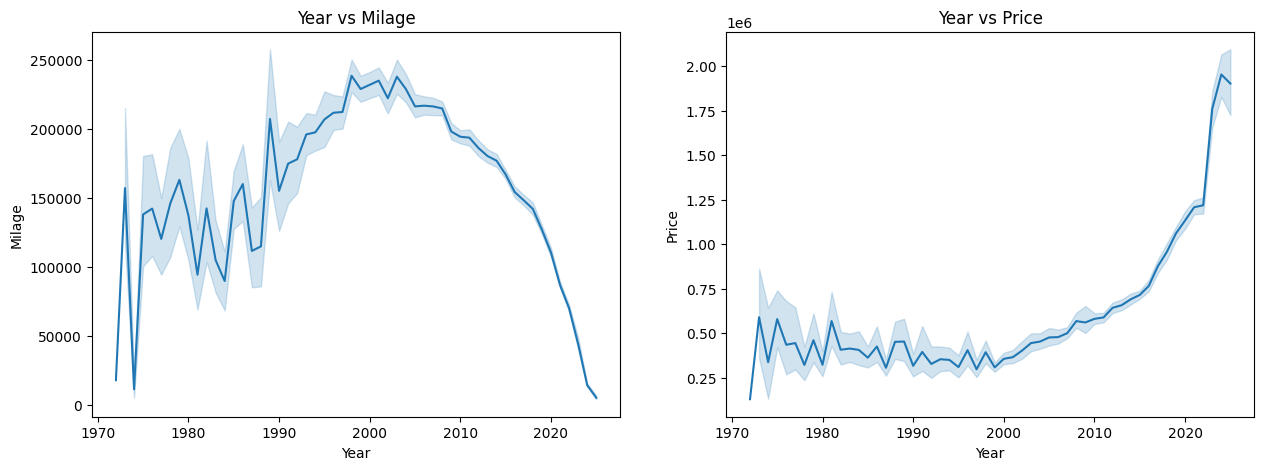

In [30]:
Visualize.comparing_Year_with_Milage_price()

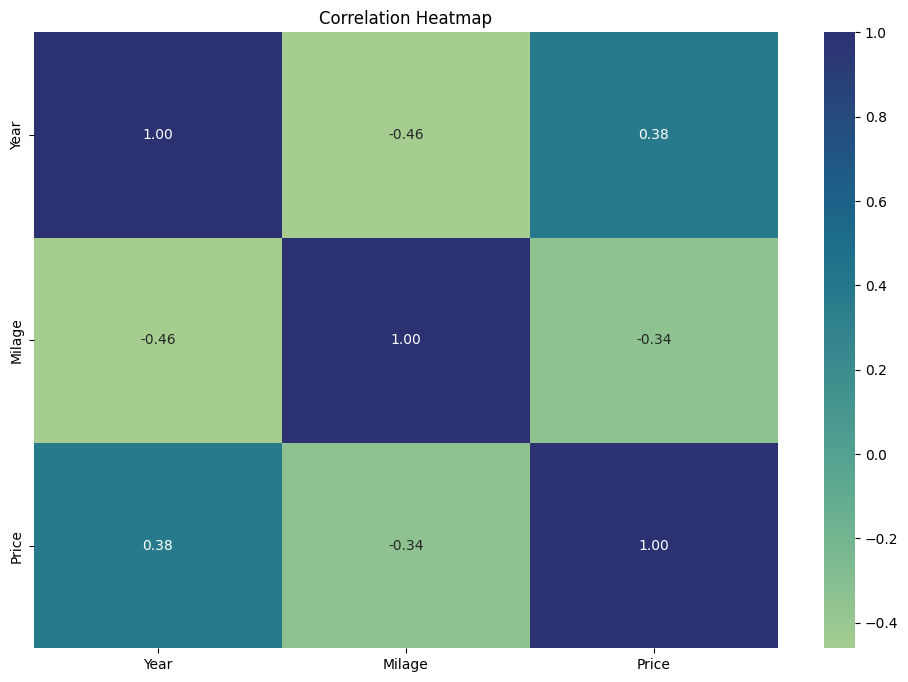

In [31]:
Visualize.heat_map(['Year','Milage','Price'])

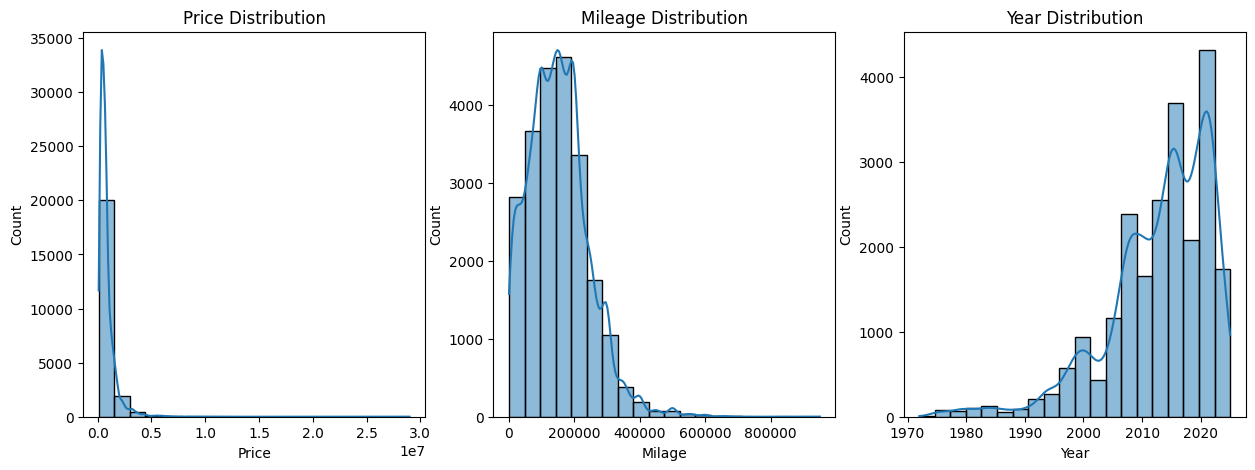

In [ ]:
Visualize.Distribution_of_Price_Mileage(df_4)

In [ ]:
q1=df_4['Price'].quantile(0.25)
q3=df_4['Price'].quantile(0.75)
IQR=q3-q1
df_4[((df_4['Price']<=(q1-1.5*IQR))|(df_4['Price']>=(q3+1.5*IQR)))].count()
df_5 = df_4[~((df_4['Price'] <= (q1 - 1.5 * IQR)) | (df_4['Price'] >= (q3 + 1.5 * IQR)))]

Brand           1562
Model           1562
Year            1562
Milage          1562
Transmission    1562
Location        1562
Color           1562
Fuel            1562
Price           1562
Post Date       1562
dtype: int64

In [ ]:
Visualize.Distribution_of_Price_Mileage(df_5)

<Axes: title={'center': 'Color Distribution'}, ylabel='Transmission'>

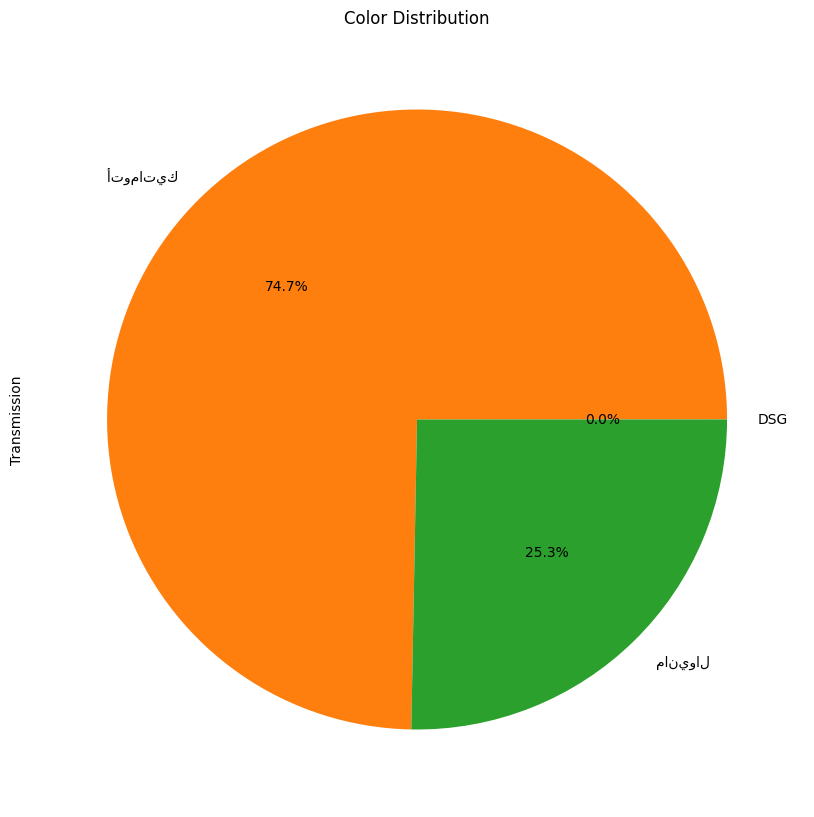

In [81]:
df_4['Transmission'].groupby(df_4['Transmission']).count().plot(kind = 'pie',autopct='%1.1f%%',figsize=(10,15),title='Color Distribution')    

In [ ]:
sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(df_5['Transmission'], labels=df_5['Transmission']) # Create pie chart
plt.show() # Show chart

In [82]:
df_5['Transmission'].groupby(df_5['Transmission']).count()

Transmission
DSG              1
أتوماتيك‎    15360
مانيوال       5630
Name: Transmission, dtype: int64